In [1]:
# --- Setup (run once) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
# Load data
df = pd.read_csv("BMW sales data (2010-2024) (1).csv")

In [3]:
# Quick sanity: keep only valid years if needed
df = df[(df["Year"]>=2010) & (df["Year"]<=2024)].copy()

In [4]:
df.groupby("Year")["Sales_Volume"].sum().head()

Year
2010    16933445
2011    16758941
2012    16751895
2013    16866733
2014    16958960
Name: Sales_Volume, dtype: int64

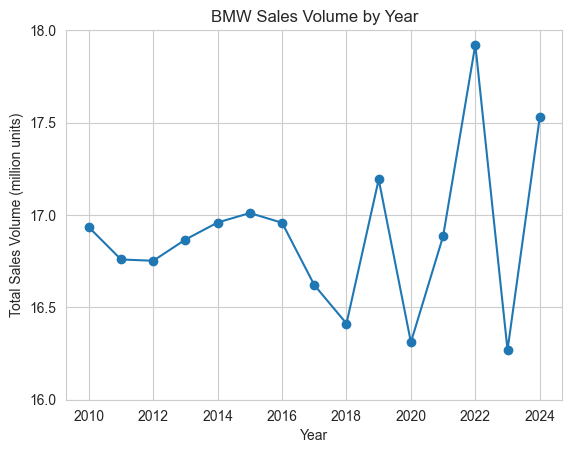

In [5]:
def convert_to_million(x,y):
    return x/1e6

yearly = df.groupby("Year")["Sales_Volume"].sum()
sales = plt.axes()
plt.plot(yearly.index, yearly.values, marker="o")
plt.title("BMW Sales Volume by Year")
plt.xlabel("Year"); plt.ylabel("Total Sales Volume (million units)")
plt.ylim(16.25e6,18e6); plt.yticks(np.arange(16e6, 18.1e6, 5e5))
sales.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_million))
plt.grid(True); plt.show()

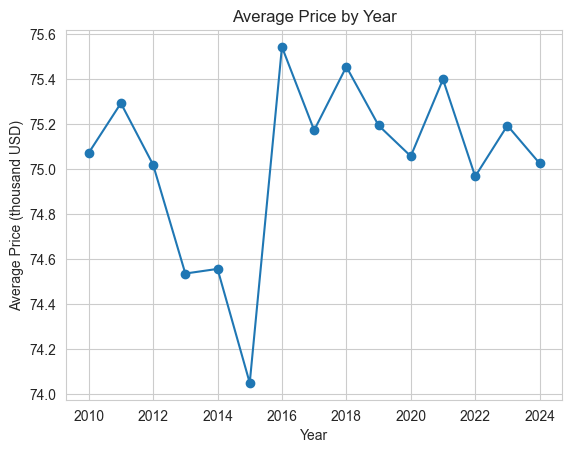

In [6]:
def convert_to_thousand(x,y):
    return x/1e3
price= plt.axes()
price.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_thousand))
avg_price = df.groupby("Year")["Price_USD"].mean().reset_index()
plt.plot(avg_price["Year"], avg_price["Price_USD"], marker="o")
plt.title("Average Price by Year")
plt.xlabel("Year"); plt.ylabel("Average Price (thousand USD)")
plt.grid(True); plt.show()


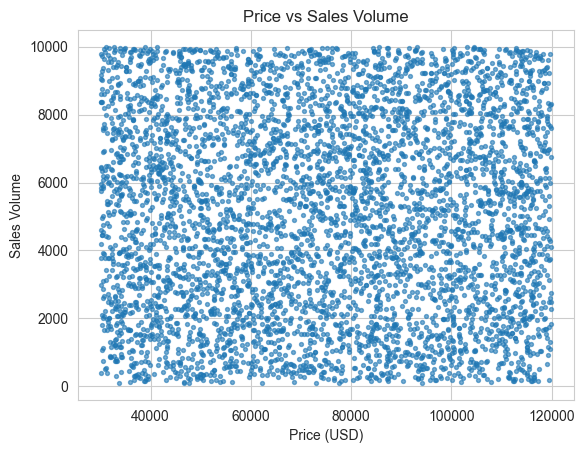

In [7]:
sample = df.sample(5000, random_state=42)
plt.scatter(sample["Price_USD"], sample["Sales_Volume"], s=8, alpha=0.6)
plt.title("Price vs Sales Volume")
plt.xlabel("Price (USD)"); plt.ylabel("Sales Volume")
plt.show()


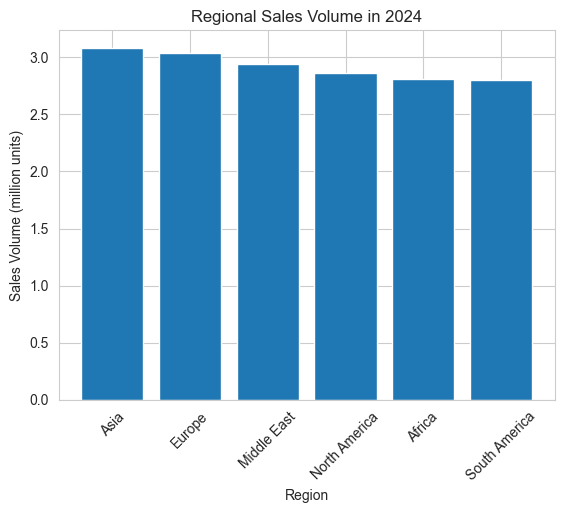

In [8]:
year_sel = 2024
sales = plt.axes()
by_region = df[df["Year"]==year_sel].groupby("Region")["Sales_Volume"].sum().sort_values(ascending=False)
plt.bar(by_region.index, by_region.values)
plt.title(f"Regional Sales Volume in {year_sel}")
plt.xlabel("Region"); plt.ylabel("Sales Volume (million units)")
sales.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_million))
plt.xticks(rotation=45); plt.show()


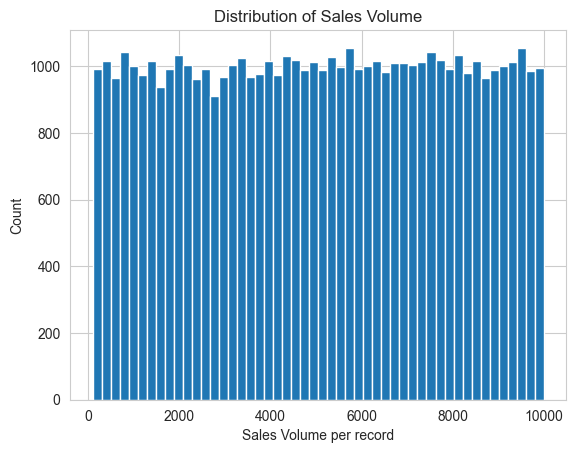

In [9]:
plt.hist(df["Sales_Volume"].dropna(), bins=50)
plt.title("Distribution of Sales Volume")
plt.xlabel("Sales Volume per record"); plt.ylabel("Count")
plt.show()


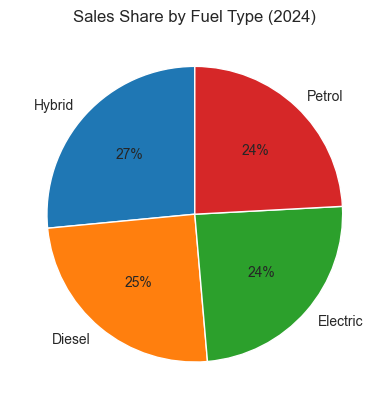

In [10]:
year_sel = 2024
fuel_share = df[df["Year"]==year_sel].groupby("Fuel_Type")["Sales_Volume"].sum().sort_values(ascending=False)
plt.pie(fuel_share.values, labels=fuel_share.index, autopct="%1.0f%%", startangle=90)
plt.title(f"Sales Share by Fuel Type ({year_sel})")
plt.show()


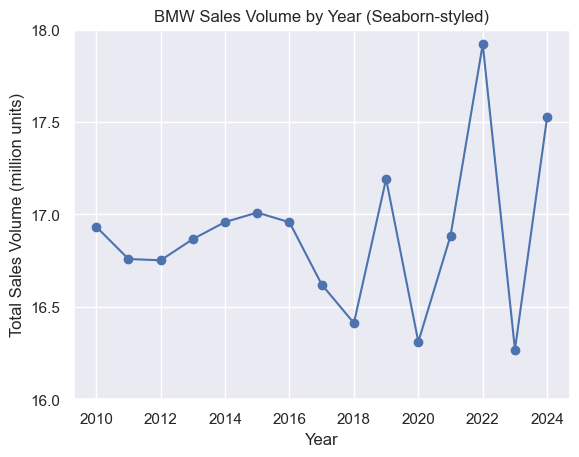

In [11]:
sb.set_theme()
# Simple improvement: line trend with seaborn style
sales = plt.axes()
yearly = df.groupby("Year")["Sales_Volume"].sum().reset_index()
plt.plot(yearly["Year"], yearly["Sales_Volume"], marker="o")  # still matplotlib; seaborn just styles
plt.title("BMW Sales Volume by Year (Seaborn-styled)")
plt.xlabel("Year"); plt.ylabel("Total Sales Volume (million units)")
plt.ylim(16.25e6,18e6); plt.yticks(np.arange(16e6, 18.1e6, 5e5))
sales.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_million))
plt.grid(True); plt.show()


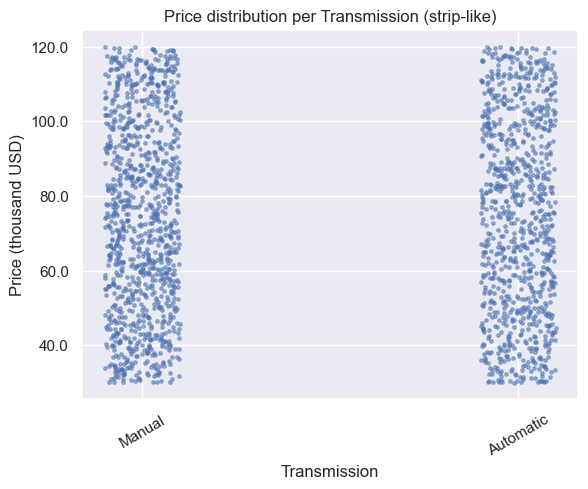

In [12]:
price= plt.axes()
price.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_thousand))


# Create a small sample to avoid overplotting
sub = df.sample(2000, random_state=42)[["Transmission","Price_USD"]].dropna()

# fake jitter with numpy (strip feel)
x_map = {cat:i for i,cat in enumerate(sub["Transmission"].unique())}
x_vals = sub["Transmission"].map(x_map).astype(float) + (np.random.rand(len(sub)) - 0.5)*0.2

plt.scatter(x_vals, sub["Price_USD"], s=6, alpha=0.5)
plt.xticks(list(x_map.values()), list(x_map.keys()), rotation=30)
plt.title("Price distribution per Transmission (strip-like)")
plt.xlabel("Transmission"); plt.ylabel("Price (thousand USD)")
plt.show()


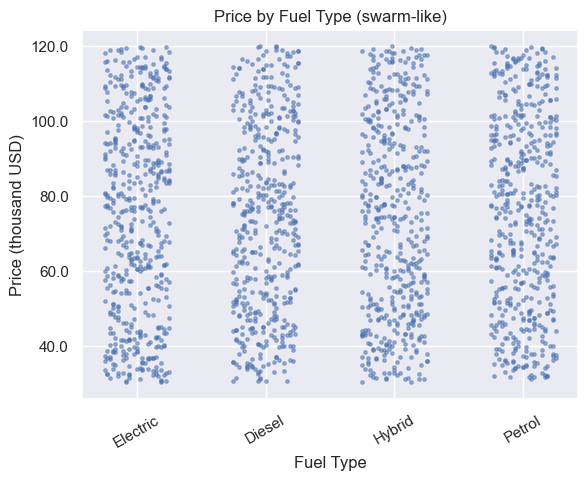

In [13]:
price= plt.axes()
price.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_thousand))


# Approximate swarm by sorting and nudging points
sub = df.sample(2000, random_state=1)[["Fuel_Type","Price_USD"]].dropna()
cats = sub["Fuel_Type"].unique()
x_positions = {c:i for i,c in enumerate(cats)}
nudged_x = []
for c in cats:
    yvals = sub.loc[sub["Fuel_Type"]==c, "Price_USD"].sort_values().values
    n = len(yvals)
    # small alternating offsets
    offs = np.tile(np.linspace(-0.25, 0.25, 25), int(np.ceil(n/25)))[:n]
    nudged_x.extend(x_positions[c] + offs)
plt.scatter(nudged_x, sub["Price_USD"], s=6, alpha=0.5)
plt.xticks(range(len(cats)), cats, rotation=30)
plt.title("Price by Fuel Type (swarm-like)")
plt.xlabel("Fuel Type"); plt.ylabel("Price (thousand USD)")
plt.show()


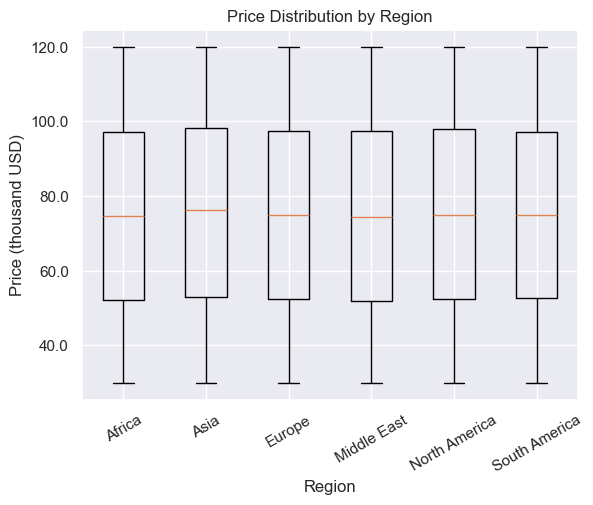

In [14]:
price= plt.axes()
price.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_thousand))

groups = [g["Price_USD"].dropna().values
          for _, g in df.groupby("Region")]
labels = [name for name, _ in df.groupby("Region")]

plt.boxplot(groups, tick_labels=labels, showfliers=True)
plt.title("Price Distribution by Region")
plt.xlabel("Region"); plt.ylabel("Price (thousand USD)")
plt.xticks(rotation=30)
plt.show()


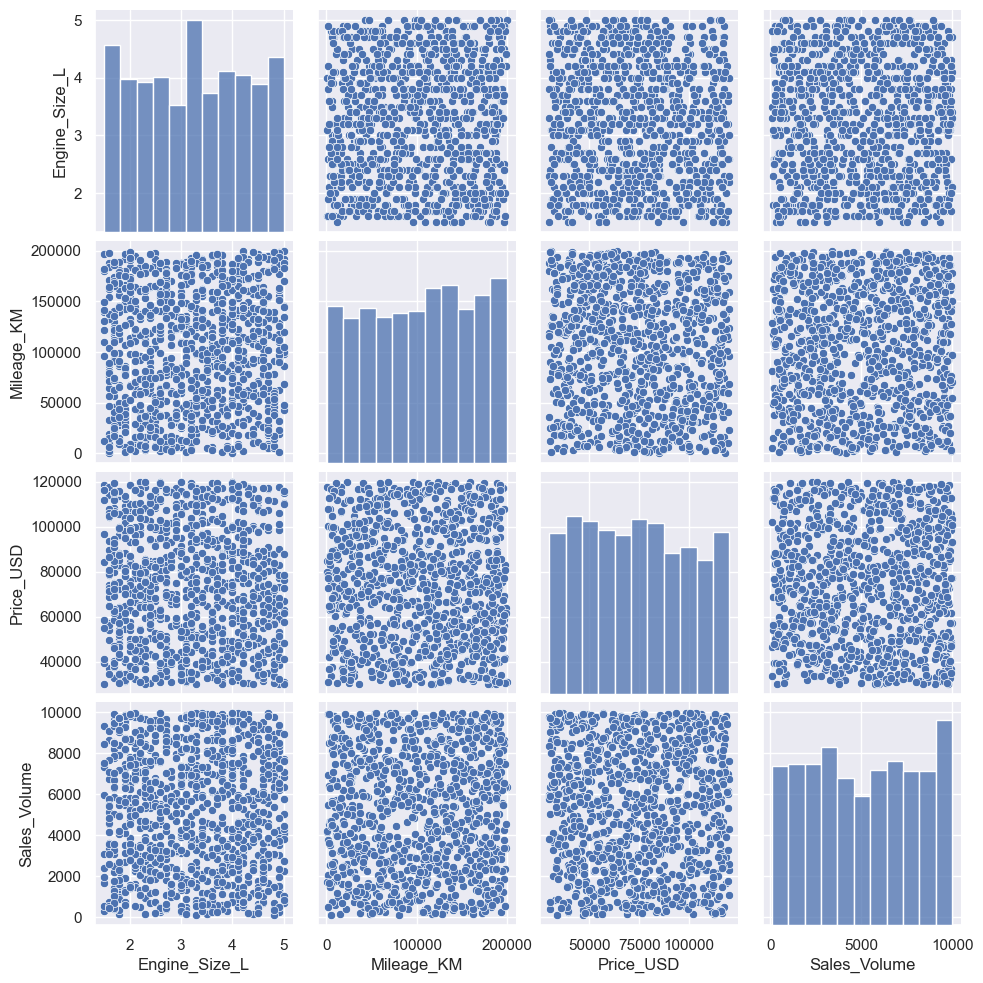

In [15]:
num_cols = ["Engine_Size_L","Mileage_KM","Price_USD","Sales_Volume"]
sb.pairplot(df[num_cols].sample(1000, random_state=42).dropna())
plt.show()


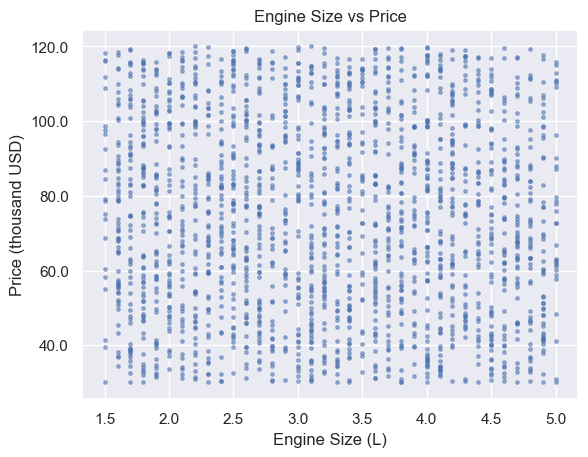

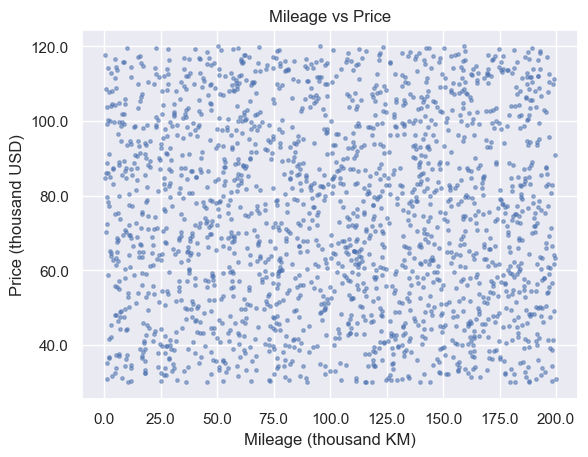

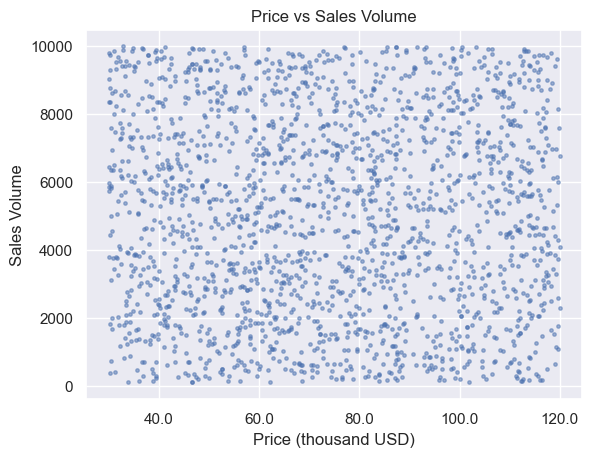

In [16]:
sub = df.sample(2000, random_state=42).dropna(subset=["Engine_Size_L","Mileage_KM","Price_USD","Sales_Volume"])

price = plt.axes()
price.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_thousand))
plt.scatter(sub["Engine_Size_L"], sub["Price_USD"], s=6, alpha=0.5)
plt.xlabel("Engine Size (L)"); plt.ylabel("Price (thousand USD)"); plt.title("Engine Size vs Price"); plt.show()

price = plt.axes()
price.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_thousand))
price.xaxis.set_major_formatter(plt.FuncFormatter(convert_to_thousand))
plt.scatter(sub["Mileage_KM"], sub["Price_USD"], s=6, alpha=0.5)
plt.xlabel("Mileage (thousand KM)"); plt.ylabel("Price (thousand USD)"); plt.title("Mileage vs Price"); plt.show()

price = plt.axes()
price.xaxis.set_major_formatter(plt.FuncFormatter(convert_to_thousand))
plt.scatter(sub["Price_USD"], sub["Sales_Volume"], s=6, alpha=0.5)
plt.xlabel("Price (thousand USD)"); plt.ylabel("Sales Volume"); plt.title("Price vs Sales Volume"); plt.show()


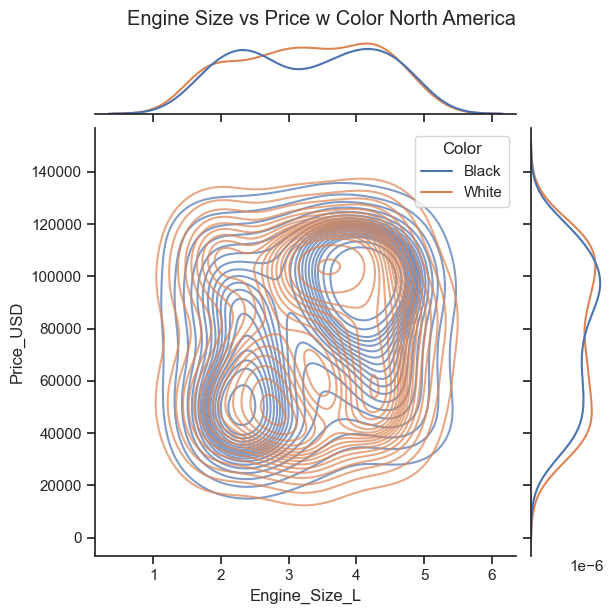

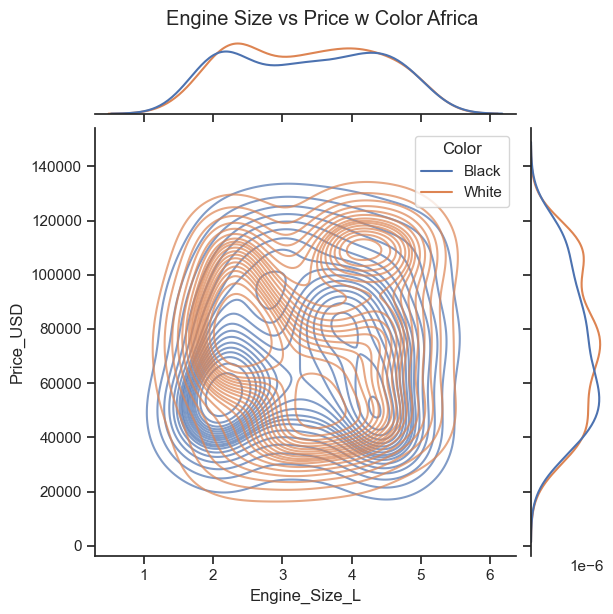

In [17]:
sub = df.sample(5000, random_state=42).dropna(subset=["Engine_Size_L","Mileage_KM","Price_USD","Sales_Volume", "Transmission", "Fuel_Type", "Region", "Color"])

sb.set_theme(style="ticks")
p1 = sb.jointplot(data = sub[(sub["Region"]=="North America") & ((sub["Color"]=="White")| (sub["Color"]=="Black"))], x="Engine_Size_L", y="Price_USD", kind="kde",hue="Color", levels = 20, alpha=.7)
p1.fig.suptitle("Engine Size vs Price w Color North America", y=1.02)

plt.show()

p2 = sb.jointplot(data = sub[(sub["Region"]=="Africa") & ((sub["Color"]=="White")| (sub["Color"]=="Black"))], x="Engine_Size_L", y="Price_USD", kind="kde",hue="Color", levels = 20,alpha=.7)
p2.fig.suptitle("Engine Size vs Price w Color Africa", y=1.02)

plt.show()